- 데이터가 충분하지 않거나 데이터 수집에 상당한 비용이 드는 경우 휸련 데이터를 수집하는 동시에 학습을 수행하는 강화 학습을 활용
> **강화 학습**<sup>reinforcement learning</sup>   
>  
> 어느 환경에 놓인 에이전트<sup>agent</sup>가 불완전한 정보에 기반해 행동을 선택하면서  
> 정보를 축적하면서 자신의 행동에 따른 보상<sup>reward</sup>을 받고 최종적으로는 총 보상을  
> 최대로 만드는 방법

- 특정한 순간의 한 수를 읽어내는 것은 슬롯머신 알고리즘이고 미래 상황까지 고려해 여러 수 앞을 내다보는 것이 강화 학습이다.
- 슬롯머신 알고리즘은 다중 슬롯머신 문제<sup>multi-armed bandit problem</sup>를 풀기 위한 알고리즘이다.
> 보상 기댓값이 다른 슬롯머신이 있을 때 어떤 슬롯머신을 선택해야 가장 많은 보상을 얻을 수 있을지를 다룬다.

---

# 11.1 슬롯머신 알고리즘 용어 정리

- 슬롯머신 알고리즘의 고유 용어
    - **팔**: 어떤 시점에서 선택 가능한 선택자
    - **방책**: 미리 정한 알고리즘에 따라 팔을 선택하는 방법. 정책<sup>policy</sup>이라고도 하며 알고리즘의 성능이 좌우된다.
    - **시행**: 팔을 선택하면 얻는 보상
    - **보상**: 어떤 팔을 선택했을 때 얻을 수 있는 가치. 리턴<sup>return</sup>이라 부르기도 함.
    - **표본**: 시행 결과에 따라 얻는 보상의 집합
    - **표본평균**: 현재 얻을 수 있는 표본의 평균값. 시행 횟수가 늘어날수록 모평균과 가까워진다. **큰 수의 법칙**
    - **모평균**: 모집단의 평균값. 실제 모집단의 평균을 구하는 것은 불가능하며 얻어진 표본에서 모평균의 확률분포를 추정해 신뢰 구간을 구해야 한다.
    - **탐색**: 적은 시행 횟수로 정보가 많지 않아 모평균이 불확실한 팔을 선택한는 것
    - **활용**: 여러 팔 주에서 모평균이 큰 팔을 선택하는 것

---

# 11.2 확률분포에 관한 사고

- 사후 분포: 표본에서 모집단의 특성을 추론하는 것
- **확률 밀도 함수**: 어떤 값이 얼마나 쉽게 표현될 수 있는지의 정도. 이산값에서는 혹률 질향 함수<sup>probability mass function</sup>라고 한다.

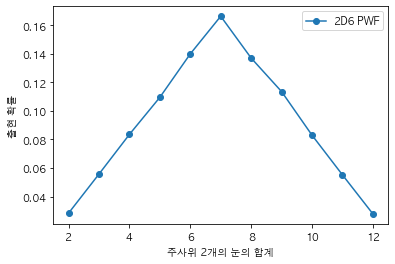

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'AppleGothic'

n = 100000
dice_total = np.random.randint(1, 7, size=n)
dice_total += np.random.randint(1, 7, size=n)

x, y = np.unique(dice_total, return_counts=True)
y = y / n # 카운트 값을 출현 확률로 변환

plt.plot(x, y, marker='o', label="2D6 PWF")
plt.legend()
plt.xlabel("주사위 2개의 눈의 합계")
plt.ylabel("출현 확률")
plt.show()

- 확률 질량 분포는 특정한 값이 나타나기 쉬운 정도 표시
- 주사위 두 개를 던졌을 때 5 이하의 숫자가 나올 확률은 확률 질량 함수를 적분한 **누적 분포 함수**<sup>cumulative distribution function</sup>(cdf)를 사용
- 이산 값에서는 적분 값과 누적합이 같아 누적 합으로 구함

[0.02831 0.08404 0.16757 0.2771  0.41708 0.58346 0.72052 0.83407 0.91705
 0.9722  1.     ]


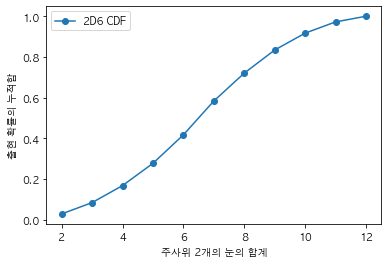

In [2]:
cumsum_y = np.cumsum(y)

print(cumsum_y)
plt.plot(x, cumsum_y, marker='o', label='2D6 CDF')
plt.legend()
plt.xlabel('주사위 2개의 눈의 합계')
plt.ylabel('출현 확률의 누적합')
plt.show()

---

# 11.3 사후 분포에 관한 사고

- 사후 분포를 이용해서 얻은 관측값에서 확률 밀도 함수를 활용해 모집단의 특성을 추정한다.
- 베르누이 시행<sup>Bernoulli trial</sup>에서는 베타 분포 함수를 이용해 모평균의 확률 밀도 함수를 구할 수 있다.
- 베타 분포는 scipy.stats.beta를 활용해 쉽게 구할 수 있다.

> - **확률 밀도 함수**  
>  
> 확률 변수의 분포를 나타내는 함수  
>  
> - **베르누이 시행**  
>  
> *결과가 두 개*인 시행을 *독립적*으로 반복하는 시행

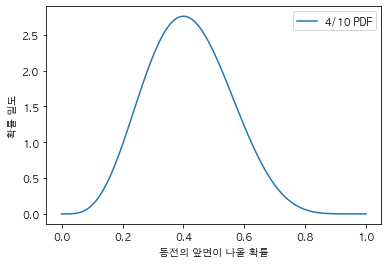

In [3]:
a = 4 # 앞면이 나온 횟수
b = 10 - a # 뒷면이 나온 횟수

x = np.linspace(0, 1, 10000) # 0~1 구간을 10,000개로 분할

plt.plot(x, scipy.stats.beta.pdf(x, a + 1, b + 1), label = "4/10 PDF")
plt.legend()
plt.xlabel("동전의 앞면이 나올 확률")
plt.ylabel("확률 밀도")
plt.show()

- pdf(probability density function): 확률 밀도 함수
- 누적 분포 구하기

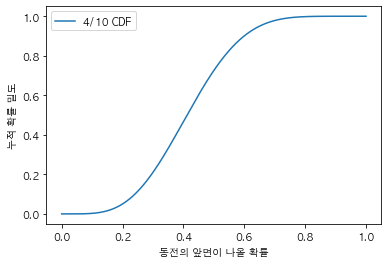

In [4]:
plt.plot(x, scipy.stats.beta.cdf(x, a + 1, b + 1), label = "4/10 CDF")
plt.legend()
plt.xlabel("동전의 앞면이 나올 확률")
plt.ylabel("누적 확률 밀도")
plt.show()

- 신뢰 구간을 코드를 이용하여 계산하려면 누적 분포함수의 역함수를 활용한다.

In [5]:
print(" 5%", scipy.stats.beta.ppf(0.05, a + 1, b + 1))
print("95%", scipy.stats.beta.ppf(0.95, a + 1, b + 1))
print("90% 신뢰 구간", scipy.stats.beta.interval(0.90, a + 1, b + 1))  # interval 함수는 신뢰 구간의 위,아래를 동시에 구하는 함수

 5% 0.19957614988383687
95% 0.6501884654280824
90% 신뢰 구간 (0.19957614988383685, 0.6501884654280824)


- 동전을 열 번 던졌을 때 앞면이 네 번 나왔다면 앞면이 나올 확률 $p$는 90% 신뢰 구간에서 0.199~0.650이라고 할 수 있음
- 동전을 10번 던졌을 때 앞면이 4번 나오는 겨우, 100번 던졌을 때 앞면이 40번 나오는 경우, 1000번 던졌을 때 400번 나오는 경우 비교

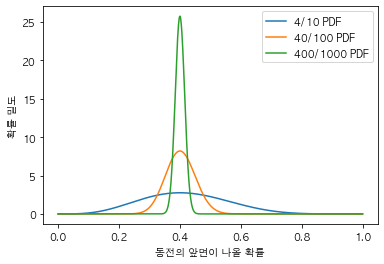

In [6]:
a1 = 4
b1 = 10 - a1
a2 = 40
b2 = 100 - a2
a3 = 400
b3 = 1000 - a3

x = np.linspace(0, 1, 1000)

plt.plot(x, scipy.stats.beta.pdf(x, a1 + 1, b1 + 1), label="4/10 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a2 + 1, b2 + 1), label="40/100 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a3 + 1, b3 + 1), label="400/1000 PDF")
plt.legend()
plt.xlabel("동전의 앞면이 나올 확률")
plt.ylabel("확률 밀도")
plt.show()

- 90% 신로 구간 알아보기

In [7]:
print("90% 신뢰 구간(4/10)\t", scipy.stats.beta.interval(0.90, a1 + 1, b1 + 1))
print("90% 신뢰 구간(40/100)\t", scipy.stats.beta.interval(0.90, a2 + 1, b2 + 1))
print("90% 신뢰 구간(400/1000)\t", scipy.stats.beta.interval(0.90, a3 + 1, b3 + 1))

90% 신뢰 구간(4/10)	 (0.19957614988383685, 0.6501884654280824)
90% 신뢰 구간(40/100)	 (0.3235574325646976, 0.4825611718520671)
90% 신뢰 구간(400/1000)	 (0.37486561630200327, 0.4257602041405756)


- 시행 횟수가 많아지면서 모평균의 신뢰 구간이 좁아진다.
- 슬롯머신 알고리즘에서는 여러 팔의 모평균을 비교해서 모평균이 가장 높은 팔을 선택한다. 하지만 모평균은 확률 밀도 분포로 나타나 어떤 팔이 가장 좋을지 비교하기 어려우므로 시행 횟수를 늘려 모푱균의 불확실성을 줄인 후 비교한다.


### 베타 분포를 기준으로 확인

- 표본이 연속 값일 경우 표본평균, 표준오치, 샘플 크기에서 정규분포나 t 분포를 이용해 모평균의 신뢰 구간을 구한다.
- 샘플 크기가 충분히 크다면(30 이상) t 분포는 정규분포로 근사한다. 

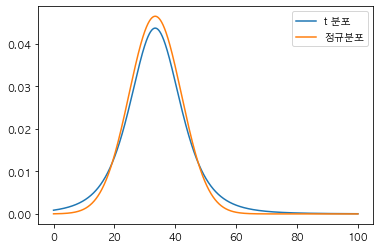

In [8]:
data = [32, 12, 20, 42,61]  #표본
n = len(data) # 샘플 크기
mean = np.mean(data)  # 표본 평균
se = np.std(data, ddof=1) / (n ** 0.5) # 표준오차
dof = n - 1 # 자유도

x = np.linspace(0, 100, 10000)

# 샘플 크기가 30 미만이면 t 분포 이용
plt.plot(x, scipy.stats.t.pdf(x, loc=mean, scale=se, df=dof), label='t 분포')

# 샘플 크기가 30 이상이면 정규분포 이용
plt.plot(x, scipy.stats.norm.pdf(x, loc=mean, scale=se), label='정규분포')

plt.legend()

---

# 11.4 사후 분포의 신뢰 구간 상한을 이용한 구현 사례

- 실제 두 개의 동전 중 어느 쪽을 선택할지 모평균의 신뢰 구간을 이용
    - 동전 A: 100번 던졌을 때 앞면이 45번, 표본평균 0.45, 시행 횟수가 적음
    - 동전 B: 200번 던졌을 때 앞면이 92번, 표본평균 0.46
- 간단하게는 각 동전 모평균의 신뢰 구간 상한값(95 백분위수 값)을 해당 팔의 평갓값으로 간주.

### 동전 A와 동전 B의 확률 밀도 함수

Text(0, 0.5, '확률 밀도')

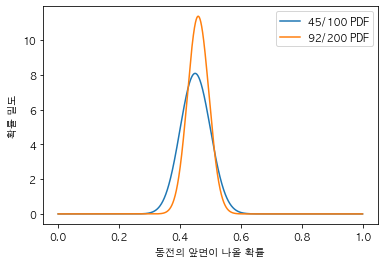

In [9]:
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2

x = np.linspace(0, 1, 10000)

plt.plot(x, scipy.stats.beta.pdf(x, a1 + 1, b1 + 1), label="45/100 PDF")
plt.plot(x, scipy.stats.beta.pdf(x, a2 + 1, b2 + 1), label="92/200 PDF")
plt.legend()
plt.xlabel("동전의 앞면이 나올 확률")
plt.ylabel("확률 밀도")

### 각 동전의 누적 분포 함수의 95 백분위수 값 확인

In [10]:
print("CoinA: ", scipy.stats.beta.ppf(0.95, a1 + 1, b1 + 1))
print("CoinB: ", scipy.stats.beta.ppf(0.95, a2 + 1, b2 + 1))

CoinA:  0.5322261940040123
CoinB:  0.5181806676164439


- 신뢰 구간 상한값을 평갓값으로 활용하면 가장 큰 모평균을 가지는 동전을 우선적으로 선택할 수 있다.
- 베이즈 UCB<sub>baysian upper confidence bound</sub>: 최댓값의 인덱스를 반환하는 np.argmax와 조합하여 평갓값이 최대인 팔을 찾아내는 것

In [11]:
np.argmax(scipy.stats.beta.ppf(0.95, [a1 + 1, a2 + 1], [b1 + 1, b2 + 1]))

0

---

# 11.5 UCB1<sup>upper confidence bound version</sup>

- 수학적 성능 증명에 사용

> $팔 i의 평가값 = \mu_i + R\sqrt\frac{2ln(모든 팔을 당긴 횟수)}{팔 i를 당긴 횟수}$

- 탐색과 활용의 균형을 적절히 맞추게 됨

In [13]:
print("CoinA:", a1 / (a1 + b1) + (2.0 * np.log(a1 + b1 + a2 + b2) / (a1 + b1)) ** 0.5)
print("CoinB:", a2 / (a2 + b2) + (2.0 * np.log(a1 + b1 + a2 + b2) / (a2 + b2)) ** 0.5)

CoinA: 0.7877508689746393
CoinB: 0.6988259298036166


---

# 11.6 확률적 슬롯머신 알고리즘

- 베이즈 UCB와 UCB1은 모두 즉각적인 보상을 전제로 하는 알고리즘이므로 배치 처리나 병렬화에는 적합하지 않음
- 스마트폰 애플리케이션에서 푸시 알림으로 보낼 메시지와 이미지 최적화 문제
    - 푸시 알림을 보낸 뒤 10분 이내에 해당 메시지를 열어 애플리케이션을 실행하는 행위를 전환으로 정의
- 보상 관측에 시간이 걸리는 환경과 배치 처리, 병렬화된 환경에서 효율적인 탐색을 하기 위해서는 탐색과 활용의 균형을 고려하는 알고리즘에 기반해 각 팔의 선택 확률을 조정해야 한다.

### 11.6.1 소프트맥스 알고리즘

- 표본평균이 높은 팔을 선택하는 확률을 높이고 낮은 팔을 선택하는 확률을 낮춤
> $어떤 팔의 선택 확률 = \frac{exp(어떤 팔의 표본평균 / 온도)}{\sum exp(각 팔의 표본평균 / 온도)}$

- 온도: 0 이상의 값을 가지며 0에 가까울수록 표본평균이 높은 팔을 우선 선택하며 1보다 커지면 무작위에 가깝게 선택한다.

In [18]:
def softmax(x, t):
    return np.exp(x / t) / np.sum(np.exp(x / t))

conversion_rate = np.array([0.12, 0.11, 0.10])
select_rate = softmax(conversion_rate, 0.01)
print(select_rate)

[0.66524096 0.24472847 0.09003057]


In [19]:
# 임의의 가중치를 붙인 난수 생성
np.random.choice(len(select_rate), size=20, p=select_rate)

array([0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [20]:
# 온도 값을 높여 무작위 선택 여부 확인
selec_rate = softmax(conversion_rate, 100)
print(select_rate)

[0.66524096 0.24472847 0.09003057]


- 담금질<sup>annealing</sup>: 소프트맥스 알고리즘은 이러한 성질의 온도 파라미터값을 점차적으로 줄이면서 탐색에서 활용으로 온도 파라미터 값을 높인다.
> $온도 파라미터 = \frac{초기 온도}{ln(k \times 모든 팔을 당긴 횟수 + 2)}$

- 처음에는 무작위로 팔을 선택하고 K 값을 통제해 온도가 낮아지는 속도를 조정한다.
- 담금질을 이용한 소프트맥스 알고리즘은 해결할 문제에 맞춰 적절한 파라미터를 미리 찾아놓아야 한다. 반드시 사전 실험이 필요하다.

### 11.6.2 톰슨 샘플링 알고리즘

- 조정해야 할 파라미터가 거의 없지만 비교적 잘 동작하는 알고리즘
- 팔의 사후 분포를 활용
- 생성한 난수로 팔의 평갓값을 결정하고 평갓값이 최대인 팔을 선택
> $팔의 평갓값 = 팔의 사후 분포에 따라 도출한 난수$

- scipy의 rvs<sup>random variates</sup>를 이용 또는 numpy의 random 아래에 있는 beta, normal, binomial 함수를 사용하여 임의의 분포를 따르는 난수 생성

In [21]:
a = 40
b = 100 - a
print(scipy.stats.beta.rvs(a + 1, b + 1, size=3))
print(np.random.beta(a + 1, b + 1, size=3))

[0.43398559 0.41481477 0.35333322]
[0.48910461 0.41468347 0.40422687]


(0.0, 8.613287455230255)

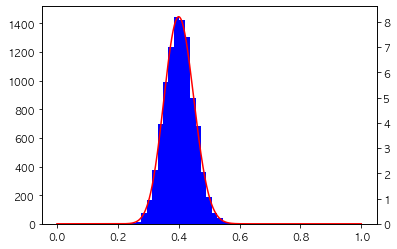

In [22]:
from matplotlib import cm

a = 40
b = 100 - a
x = np.linspace(0, 1, 10000)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# beta 분포로 난수를 10,000개 만들고 히스토그램으로 표현
ax1.hist(scipy.stats.beta.rvs(a + 1, b + 1, size=10000), bins=20, color="blue")

# beta 분포의 확률 밀도 함수를 화면에 그림
ax2.plot(x, scipy.stats.beta.pdf(x, a + 1, b + 1), color="red")
ax2.set_ylim(0, )

In [23]:
# 실제 TS(톰슨 샘플링) 알고리즘을 이용하여 팔을 선택
a1 = 45
b1 = 100 - a1
a2 = 92
b2 = 200 - a2

coin_a_dist = scipy.stats.beta.rvs(a1 + 1, b1 + 1, size=3)
coin_b_dist = scipy.stats.beta.rvs(a2 + 1, b2 + 1, size=3)

print("CoinA: ", coin_a_dist)
print("CoinB: ", coin_b_dist)
print("CoinA > CoinB", coin_a_dist > coin_b_dist)

CoinA:  [0.54678311 0.46686009 0.53016717]
CoinB:  [0.50676319 0.43689924 0.43572546]
CoinA > CoinB [ True  True  True]


- TS 알고리즘은 난수에 기반해 실행할 때마다 결과가 달라진다.

In [24]:
# TS 알고리즘을 실행하여 각 팔을 선택할 확률 구하기
n = 10000
thompson_sampling_score = np.random.beta([a1 + 1, a2 + 1], [b1 + 1, b2 + 1], size=(n, 2))
selected_arm = np.argmax(thompson_sampling_score, axis=1)
arm_choice_rate = np.bincount(selected_arm) / n
arm_choice_rate

array([0.4489, 0.5511])

- 팔이 많아지면 계산만으로는 확률을 구하기 어려우므로 TS 알고리즘을 이용한다.

---

# 11.7 다양한 슬롯머신 알고리즘 비교

In [40]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

# 다양한 알고리즘 구현
def random_strategy(success_counts, fail_counts):
    return np.random.choice(len(success_counts))

def baysian_ucb_strategy(success_counts, fail_counts, q=0.95):
    score = scipy.stats.beta.ppf(q, success_counts + 1, fail_counts + 1)
    return np.argmax(score)

def ucb1_strategy(success_counts, fail_counts):
    mean = (success_counts) / (success_counts + fail_counts)
    total_count = np.sum(success_counts + fail_counts)
    ucb = (
            2.0 * np.log(total_count) / (success_counts + fail_counts)
          ) ** 0.5
    score = mean + ucb
    return np.argmax(score)

def softmax_strategy(success_counts, fail_counts, t=0.05):
    mean = (success_counts) / (success_counts + fail_counts)
    select_rate = np.exp(mean / t)/ np.sum(np.exp(mean / t))
    return np.random.choice(len(select_rate), p=select_rate)

def softmax_annealing_strategy(success_counts, fail_counts, initial_t=0.1, k=100.0):
    mean = (success_counts) / (success_counts + fail_counts)
    t = initial_t / np.log(k * np.sum(success_counts + fail_counts) + 2)
    select_rate = np.exp(mean / t) / np.sum(np.exp(mean / t))
    return np.random.choice(len(select_rate), p=select_rate)

def thompson_sampling_strategy(success_counts, fail_counts):
    score = scipy.stats.beta.rvs(success_counts + 1, fail_counts + 1)
    return np.argmax(score)

actual_cvr = [0.12, 0.11, 0.10]
bandit_round = 1000000
#random_seed = 1234567
random_seed = 1234

strategy_list = [
    ("Random", random_strategy),
    ("Baysian_UCB", baysian_ucb_strategy),
    ("UCB1", ucb1_strategy),
    ("Softmax", softmax_strategy),
    ("Softmax_annealing", softmax_annealing_strategy),
    ("Thompson_sampling", thompson_sampling_strategy)
]

scores = []
arm1_select_rates = []

for name, select_arm_method in strategy_list:
    # random seed를 초기화한다
    # scipy는 numpy의 난수를 사용하므로 scipy도 동시에 초기화할 수 있다
    np.random.seed(random_seed)

    success_counts = np.array([0.0, 0.0, 0.0])
    fail_counts = np.array([0.0, 0.0, 0.0])
    
    scores.append([])
    arm1_select_rates.append([])
    
    for i in range(bandit_round):
        if i < 1000:  # 최초 1,000 라운드는 무작위로 송신한다
            selected_arm = random_strategy(success_counts, fail_counts)
        else:
            selected_arm = select_arm_method(success_counts, fail_counts)

        # 선택한 팔의 컨버전 여부 판덩
        if np.random.rand() < actual_cvr[selected_arm]:
            success_counts[selected_arm] += 1
        else:
            fail_counts[selected_arm] += 1
        
        score = np.sum(success_counts) / np.sum(success_counts + fail_counts)
        scores[-1].append(score)
        
        arm1_select_rate = (success_counts[0] + fail_counts[0]) / np.sum(success_counts + fail_counts)
        arm1_select_rates[-1].append(arm1_select_rate)

Random 0.110202
Baysian_UCB 0.120002
UCB1 0.117756
Softmax 0.111173
Softmax_annealing 0.117485
Thompson_sampling 0.119458


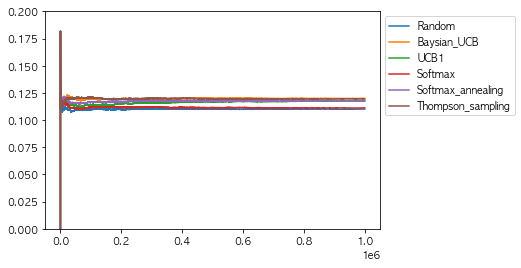

In [41]:
# 각 시행의 기댓값과 최종 시점의 기댓값

for i in range(len(strategy_list)):
    algorithm_name = strategy_list[i][0]
    print(algorithm_name, scores[i][-1])
    plt.plot(scores[i], label=algorithm_name)
    plt.ylim(0.0, 0.2)
    
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

Random 0.332627
Baysian_UCB 0.993352
UCB1 0.816839
Softmax 0.400391
Softmax_annealing 0.796593
Thompson_sampling 0.98815


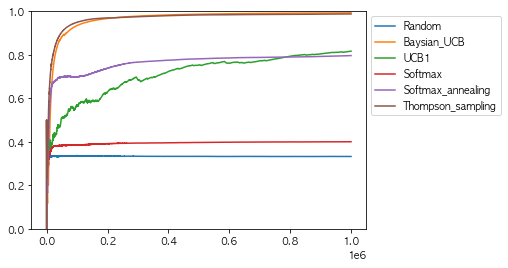

In [42]:
# 각 알고리즘에서 팔 1을 선택할 확률

for i in range(len(strategy_list)):
    algorithm_name = strategy_list[i][0]
    print(algorithm_name, arm1_select_rates[i][-1])
    plt.plot(arm1_select_rates[i], label=algorithm_name)
    plt.ylim(0, 1)
    
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

- 로그를 사용한 식은 온도가 낮아지는 속도가 느려 다른 함수를 이용하는 편이 좋다.
- 실험할 때는 난수 시드 값을 여러 번 바꾸면서 통계적으로 결과를 분석한다.
- 베이즈나 UCB나 TS 알고리즘은 우연히 잘못된 초기 상태에 빠지더라도 그 기능을 잘 수행한다.

---

# 11.8 부트스트랩 알고리즘을 이용한 컨텍스트 기반 슬롯머신 구현

- 컨텍스트 기반 슬롯머신<sup>contextual multi-armed bandit</sup>: 컨텍스트에 기반하여 어떤 팔을 선택할지 결정하는 것
- 부트스르탭 알고리즘<sup>bootstrap algorithm</sup>: 표본이 중복되는 것을 허용하고 여러 번 샘플링 하면서 모집단의 특성을 추정하거나 여러 학습기를 만들어 정확도를 높임
- 부트스트랩 알고리즘을 이용하면 예측값과 예측값의 불확실성을 동시에 얻을 수 있다.

In [70]:
# 부트스트랩을 이용한 컨텍스트 기반 슬롯머신 클래스

import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

class BootstrapTSContextualBandit:
    # 팔별로 학습기를 여러개 생성
    def __init__(self, regression_model_cls, param, arm_num=2, model_num=100, seed=None, bagging_rate=1.0):
        self.arm_num = arm_num
        self.model_num = model_num
        self.bagging_rate = bagging_rate
        self.seed = seed
        self.models = [
            [
                regression_model_cls(**param)
                for i in range(model_num)
            ]
            for j in range(self.arm_num)
        ]
        self.is_initialized = False
        
    # 팔별로 학습을 수행하기 위해 선택한 팔을 인수로 받는다.
    # sample_weight를 통해 표본별로 가중치를 조절할 수 있다.
    # 해당 샘플의 가중치는 샘플링 횟수 값이다. 
    def fit(self, x, arm, y):
        np.random.seed (self.seed)
        
        for arm_id in range(self.arm_num):
            _x = x[arm == arm_id]
            _y = y[arm == arm_id]
            n_samples = len(_y)

            for i in range(self.model_num):
                # 이용할 표본을 난수로 결정
                picked_sample = np.random.randint(0, n_samples, int(n_samples * self.bagging_rate))
                # 이용할 표본을 표본 가중치로 변환
                bootstrap_weight = np.bincount(picked_sample, minlength=n_samples)
                # 표본 가중치를 붙여 학습
                self.models[arm_id][i].fit(_x, _y, sample_weight=bootstrap_weight)

        self.is_initialized = True
    
    # 입력된 특징량을 기반으로 각 특징량의 팔별 예측값 평균과 분산을 반환한다.
    def _predict_mean_sd(self, x, arm_id):
        # 각 예측기의 평균값과 표준편차를 구한다.
        predict_result = np.array([estimator.predict(x) for estimator in self.models[arm_id]])
        
        mean = np.mean(predict_result, axis=0)
        sd = np.std(predict_result, axis=0)
        
        return mean, sd
    
    # _predeict_mean_sd에서 생성된 평균과 분산으로 TS 알고리즘을 활용해 평갓값을 생성한다.
    def _predict_thompson_sampling(self, x, arm_id):
        # 평균값과 표준편차에서 정규분포의 난수를 만들어 평갓값으로 한다.
        mean, sd = self._predict_mean_sd(x, arm_id)
        return np.random.normal(mean, sd)
    
    # 특징량을 인수로 받아 선택할 팔을 반환한다.
    def choice_arm(self, x):
        if self.is_initialized is False:
            return np.random.choice(self.arm_num, x.shape[0])
        
        # 팔별로 평갓값 생성
        score_list = np.zeros((x.shape[0], self.arm_num), dtype=np.float64)
        for arm_id in range(self.arm_num):
            score_list[:, arm_id] = self._predict_thompson_sampling(x, arm_id)
            
        # 평갓값이 최대인 팔을 반환
        return np.argmax(score_list, axis=1)
                              

In [71]:
# 샘플 데이터 만들기
# 난수로 특징량을 만들고 각 팔의 계수를 난수에 곱해서 해당 팔의 전환률 theta를 만든다.

def generate_sample_data(sample_num=10000):
    weight = np.array([
        [0.05, 0.05, -0.05, 0.0, 0.0, 0.0, 0.0],
        [-0.05, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0],
        [0.05, -0.05, 0.05, 0.0, 0.0, 0.0, 0.0]
    ])
    
    arm_num, feature_num = weight.shape
    feature_vector = np.random.rand(sample_num, feature_num)
    
    theta = np.zeros((sample_num, arm_num))
    for i in range(arm_num):
        theta[:, i] = np.sum(feature_vector * weight[i], axis=1)
        
    is_cv = (theta > np.random.rand(sample_num, arm_num)).astype(np.int8)
    
    return feature_vector, is_cv

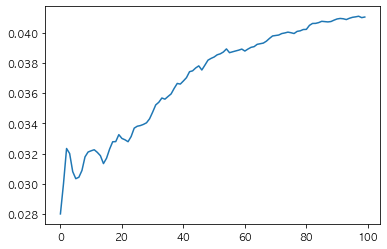

In [72]:
# 만들어진 알고리즘 실제 동작 확인

import sklearn.tree

loop_num = 100
batch_size = 1000

base_model = sklearn.tree.DecisionTreeRegressor
param = {
    'max_depth': 6,
    'min_samples_split': 10,
    'max_features': None
}

model = BootstrapTSContextualBandit(base_model, param, arm_num=3)
x_history = np.zeros((0, 7))
y_history = np.zeros(0)
arm_history = np.zeros(0)
scores = []

for i in range(loop_num ):
    x, is_cv = generate_sample_data(batch_size)
    
    choiced_arm = model.choice_arm (x)
    y = is_cv[range(batch_size), choiced_arm]
    
    x_history = np.vstack((x_history, x))
    y_history = np.append(y_history, y)
    arm_history = np.append(arm_history, choiced_arm)
    
    model.fit(x_history, arm_history, y_history)
    
    score = np.sum(y_history) / y_history.shape[0]
    scores.append(score)
    
plt.plot(scores)

- 결정 트리에서는 공간을 잘라 국소적으로 평균값을 구한다.

---

# 11.9 현실 과제

- 베이즈 UCB나 UCB1 같은 알고리즘은 결정적이고 순차적이어서 실제 환경에 그대로 사용하기 어렵다.

### 11.9.1 보상 시간의 지연

- 광고 클릭의 경우 현실에서는 광고 노출 후 얼마의 시간이 지나 광고를 클릭했는지 알 수가 없다.
- 따라서 보상 시간이 지연된다는 것을 전제로 알고리즘을 구성해야 한다.
- 웹 광고처럼 새로운 팔이 빈번히 추가되는 환경에서는 새로운 팔을 적극적으로 탐색하는 경우가 생긴다.

### 11.9.2 슬롯머신에 따라 편향되는 온라인 실험용 로그 데이터

- 현실에서는 특정한 팔을 선택했을 때 일어나는 현상의 조합을 모두 제시할 수 없다.
- 로그 데이터가 현향되지 않도록 하려면 해당 로그 데이터가 나타날 가능성이 얼마나 되는지 경향 점수의 역수로 수정한다.

### 11.9.3 유행에 따라 시시각각 달라지는 유효한 팔

- 현실에서는 유행에 따라 사용자의 행동이 달라진다.
- 팔의 평갓값을 계산할 때 며칠이나 또는 몇 만 건 등으로 표본을 제한하는 것이 좋다.

### 11.9.4 최선의 팔이 최적이 아닐 수 있다

- 슬롯머신 알고리즘의 목적은 최선의 팔을 선택하는 것이지만 때론 최선의 팔이 부작용이 되기도 한다.
- 각 팔의 평갓값에 소프트맥스 알고리즘을 적용하여 송신 비율을 정하는 것으로 보완한다.

### 11.9.5 도중에 추가되는 팔

- 슬롯머신 알고리즘이 동작하는 상태에서 팔이 늘어나거나 줄어드는 경우가 많다.
- 팔의 선택 횟수가 일정 미만이면 그 시점에서 가장 좋은 팔의 사후 분포와 같은 평갓값을 설정해 보완한다.

---

# 11.10 A/B 테스트, 업리프트 모델링, 슬롯머신 알고리즘의 관계

- A/B 테스트와 업리프트 모델링은 슬롯머신 알고리즘과 컨텍스트 기반 슬롯머신 알고리즘의 서브셋이다.
- 슬롯머신 알고리즘이나 컨텍스트 기반 슬롯머신 알고리즘은 선택을 한 사람의 의사결정 비용을 낮추는 것과 연결된다.
- 슬롯머신 알고리즘은 팔을 선택했을 대 즉시 보상이 돌아오나 A/B 테스트는 개입에서 전환까지 시간이 길어도 상관 없다. 따라서 중장기적 효과 측정은 A/B 테스트를 활용한다.

---

# 11.11 정리

- 슬롯머신 알고리즘은 훈련 데이터가 없거나 사용자에게 추천할 때 효과적으로 동작한다.
